In [20]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import wordpunct_tokenize
import matplotlib.pyplot as plt
import nltk

/Users/chunhsiangchang/anaconda2/envs/Python3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
import os

In [3]:
os.listdir()

['.DS_Store',
 'Blake_Shelton',
 'four_performance_word_count.csv',
 'Kelly_Clarkson',
 'Adam_Levine',
 'all_comment_word_count.csv',
 'Drew_Cole.csv',
 'Alicia_Keys',
 '.ipynb_checkpoints',
 'Text Analytics - Sentiment Scores.ipynb',
 'try_w_count.ipynb',
 'try_vader.ipynb']

In [5]:
mentors = ['Blake_Shelton', 'Kelly_Clarkson', 'Adam_Levine', 'Alicia_Keys']

In [13]:
os.listdir(os.getcwd()+'/' +'Blake_Shelton')[0]

'Gary_Edwards.csv'

In [27]:
comment_pd = pd.DataFrame()
comment_pd

""


In [30]:
first_time = 0
for i in mentors:
    this_dir = os.getcwd() +'/' + i  + '/'
    singers = os.listdir(this_dir)
    for j in singers:
            if first_time == 0:
                comment_pd = pd.read_csv(this_dir + j)
                first_time = 1
            else:
                comment_pd = pd.concat([comment_pd, pd.read_csv(this_dir + j)])
                

/Users/chunhsiangchang/anaconda2/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [31]:
len(comment_pd)

4211

In [32]:
four_comments = comment_pd

In [2]:
sid = SentimentIntensityAnalyzer()

We have youtube video comment data of Wilkes, Austin, Spensha(got saved by the mentor).

wilkes = pd.read_csv("Wilkes.csv")

austin = pd.read_csv("Austin_Giorgio.csv")

spensha = pd.read_csv("Spensha_Baker.csv")

gary = pd.read_csv("Gary_Edwards.csv")

four_comments = pd.concat([wilkes, austin, spensha, gary])

In [33]:
def text_tokenize_cleaning(comment):
    token = word_tokenize(comment)
    cleaned_token = []
    for word in token:
        lower = lowercase= word.lower()
        if lower not in punctuation and lower not in stop_words:
            cleaned_token.append(word)
    return cleaned_token

In [34]:
from nltk.corpus import stopwords 
from nltk import word_tokenize
from string import punctuation

stop_words = set(stopwords.words('english'))
tokenized_comments = four_comments[~four_comments["commentText"].isnull()]["commentText"].map(text_tokenize_cleaning)

In [35]:
len(tokenized_comments)

2894

In [36]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [37]:
comments_pos_tagging = tokenized_comments.map(nltk.pos_tag)

In [38]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
l = []
for comment in comments_pos_tagging:
    for word, tag in comment:
        wntag = get_wordnet_pos(tag)
        if wntag is None:
            lemma = lemmatizer.lemmatize(word)
            l.append(lemma)
        else:
            lemma = lemmatizer.lemmatize(word, pos=wntag) 
            l.append(lemma)

In [39]:
pd.Series(l).value_counts().to_csv("all_comment_word_count.csv")

In [13]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import wordpunct_tokenize
import matplotlib.pyplot as plt

In [2]:
sid = SentimentIntensityAnalyzer()

We have youtube video comment data of Wilkes, Austin, Spensha(got saved by the mentor).

In [3]:
wilkes = pd.read_csv("Wilkes.csv")

In [4]:
austin = pd.read_csv("Austin_Giorgio.csv")

In [31]:
spensha = pd.read_csv("Spensha_Baker.csv")

For youtube comments, there are "replies" to the comments, which failed to be download in a csv format. For "reply" the whole row in the data will be NULL and that's why I do try and expect. And those rows will be counted as having 0 sentiment in this function.

In [73]:
def get_comment_sentiment(comment_series):
    fail_count = 0
    neu_sentiment_list = []
    sentiment_dict= {"neg":[], "neu":[], "pos":[], "compound":[]}
    for index, comment_message in enumerate(comment_series):
        try:
            sentiment_score_dict = sid.polarity_scores(comment_message)
            for j in sentiment_score_dict:
                sentiment_dict[j].append(sentiment_score_dict[j])
        except:
#            print("no sentiment for:", comment_message)
            for j in sentiment_score_dict:
                sentiment_dict[j].append(0) 
            fail_count +=1
    
        if sentiment_dict["compound"][-1] == 0.0:
#            print("find", index)
            neu_sentiment_list.append(index)
    print(fail_count,"over", len(comment_series), "posts of sentiments were not counted")
    return( pd.DataFrame(sentiment_dict), neu_sentiment_list)
        

In [91]:
wilkes_sentiment, wilkes_neu_i = get_comment_sentiment(wilkes["commentText"])
wilkes_sentiment[:3]

94 over 404 posts of sentiments were not counted


,neg,neu,pos,compound
0,0.024,0.671,0.305,0.9716
1,0.155,0.845,0.000,-0.1655
2,0.000,0.604,0.396,0.9468


In [90]:
austin_sentiment, ausitin_neu_i = get_comment_sentiment(austin["commentText"])
austin_sentiment[:3]

76 over 290 posts of sentiments were not counted


,neg,neu,pos,compound
0,0.162,0.662,0.176,0.1027
1,0.000,0.571,0.429,0.4588
2,0.185,0.727,0.087,-0.5223


In [89]:
spensha_sentiment, spensha_neu_i = get_comment_sentiment(spensha["commentText"])
spensha_sentiment[:3]

40 over 146 posts of sentiments were not counted


,neg,neu,pos,compound
0,0.0,0.347,0.653,0.9217
1,0.0,0.714,0.286,0.9118
2,0.0,0.926,0.074,0.5994


Text(0.5,0,"['Spensha', 'Wilkes', ' Austin']")

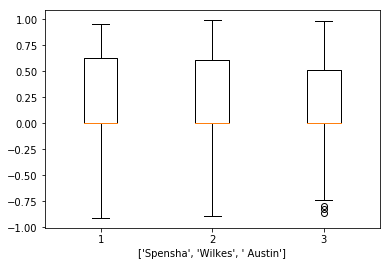

In [33]:
plt.boxplot([spensha_sentiment['compound'], wilkes_sentiment['compound'], austin_sentiment['compound']])
plt.xlabel(['Spensha' ,'Wilkes',' Austin'])

In [34]:
pd.DataFrame({'Spensha': spensha_sentiment['compound'],
              "Wilkes":wilkes_sentiment['compound'], 
              "Austin": austin_sentiment['compound']}).describe()

,Spensha,Wilkes,Austin
count,146.000000,404.000000,290.000000
mean,0.215634,0.209431,0.168207
std,0.454523,0.434821,0.425267
min,-0.909700,-0.893400,-0.860800
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.624650,0.611550,0.508350
max,0.950100,0.990300,0.987500


In the second function, I don't include the "reply" data, which seems to  be a better way to calculate sentiment

In [81]:
def get_comment_sentiment_no_reviews(comment_series):
    fail_count = 0
    neu_sentiment_list = []
    sentiment_dict= {"neg":[], "neu":[], "pos":[], "compound":[]}
    for index, comment_message in enumerate(comment_series):
        try:
            sentiment_score_dict = sid.polarity_scores(comment_message)
            for j in sentiment_score_dict:
                sentiment_dict[j].append(sentiment_score_dict[j])
        except:
            continue
    
        if sentiment_dict["compound"][-1] == 0.0:
#            print("find", index)
            neu_sentiment_list.append(index)
    print(len(neu_sentiment_list),"over", len(comment_series), "posts of sentiments are neutral")
    return( pd.DataFrame(sentiment_dict), neu_sentiment_list)
        

In [82]:
wilkes_sentiment_noR, wilkes_neu_i_noR = get_comment_sentiment_no_reviews(wilkes["commentText"])

72 over 404 posts of sentiments are neutral


In [92]:
austin_sentiment_noR, ausin_neu_i_noR = get_comment_sentiment_no_reviews(austin["commentText"])

44 over 290 posts of sentiments are neutral


In [94]:
spensha_sentiment_noR, spensha_neu_i_noR = get_comment_sentiment_no_reviews(spensha["commentText"])

15 over 146 posts of sentiments are neutral


This is probably the way you can update VADER's dictionary. Hope you can start by improving this!

In [96]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
sia.lexicon

{'$:': -1.5,
 '%)': -0.4,
 '%-)': -1.5,
 '&-:': -0.4,
 '&:': -0.7,
 "( '}{' )": 1.6,
 '(%': -0.9,
 "('-:": 2.2,
 "(':": 2.3,
 '((-:': 2.1,
 '(*': 1.1,
 '(-%': -0.7,
 '(-*': 1.3,
 '(-:': 1.6,
 '(-:0': 2.8,
 '(-:<': -0.4,
 '(-:o': 1.5,
 '(-:O': 1.5,
 '(-:{': -0.1,
 '(-:|>*': 1.9,
 '(-;': 1.3,
 '(-;|': 2.1,
 '(8': 2.6,
 '(:': 2.2,
 '(:0': 2.4,
 '(:<': -0.2,
 '(:o': 2.5,
 '(:O': 2.5,
 '(;': 1.1,
 '(;<': 0.3,
 '(=': 2.2,
 '(?:': 2.1,
 '(^:': 1.5,
 '(^;': 1.5,
 '(^;0': 2.0,
 '(^;o': 1.9,
 '(o:': 1.6,
 ")':": -2.0,
 ")-':": -2.1,
 ')-:': -2.1,
 ')-:<': -2.2,
 ')-:{': -2.1,
 '):': -1.8,
 '):<': -1.9,
 '):{': -2.3,
 ');<': -2.6,
 '*)': 0.6,
 '*-)': 0.3,
 '*-:': 2.1,
 '*-;': 2.4,
 '*:': 1.9,
 '*<|:-)': 1.6,
 '*\\0/*': 2.3,
 '*^:': 1.6,
 ',-:': 1.2,
 "---'-;-{@": 2.3,
 '--<--<@': 2.2,
 '.-:': -1.2,
 '..###-:': -1.7,
 '..###:': -1.9,
 '/-:': -1.3,
 '/:': -1.3,
 '/:<': -1.4,
 '/=': -0.9,
 '/^:': -1.0,
 '/o:': -1.4,
 '0-8': 0.1,
 '0-|': -1.2,
 '0:)': 1.9,
 '0:-)': 1.4,
 '0:-3': 1.5,
 '0:03': 1.9,
 '

In [95]:
pd.DataFrame({'Spensha': spensha_sentiment_noR['compound'],
              "Wilkes":wilkes_sentiment_noR['compound'], 
              "Austin": austin_sentiment_noR['compound']}).describe()

,Spensha,Wilkes,Austin
count,106.000000,310.000000,214.000000
mean,0.297005,0.272935,0.227944
std,0.510779,0.478745,0.481353
min,-0.909700,-0.893400,-0.860800
25%,0.000000,0.000000,0.000000
50%,0.445050,0.296000,0.248300
75%,0.701725,0.669550,0.636900
max,0.950100,0.990300,0.987500


In [41]:
austin["commentText"][:10]

0    this sound exactly like the original song, don...
1                   This was cute. Nothing spectacular
2    this is honestly the song he needed, he wasnt ...
3      we love your voice Austin Giorgio,don't give up
4                                    Ugh that suit 😍😍😍
5                    Why he sounds like Michael Buble?
6                                 Damn this was boring
7    I really think this was an awful song choice. ...
8    I think this song choice wasn't a wise one. It...
9    This man is my decepcion off the playoffs i th...
Name: commentText, dtype: object

In [35]:
austin_sentiment.iloc[4]

neg         0.4830
neu         0.5170
pos         0.0000
compound   -0.4215
Name: 4, dtype: float64

In [77]:
wilkes["commentText"][:15]

0     I loved and love this version that you made of...
1     He lost maybe cause of that but he shouldn’t have
2     I absolutely love Wilkes performances...lookin...
3     Okay so Wilkes, this performance was Stupid go...
4                                      OMG that was lit
5                                This version was sick!
6     Love your voice and thought sure you would be ...
7                                     bring him back...
8                                           r o b b e d
9                                                   😍😍😍
10    Was the mic drop intentionally or an accident?...
11                                                  NaN
12    I want to download Wilkes singing this song. \...
13                                                  NaN
14                                              Amazing
Name: commentText, dtype: object